<a href="https://colab.research.google.com/github/olegkleiman/tf2/blob/master/classification_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras classification for Fashion MNIST 

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.4.1


# Load the dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Define the class labels

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the dataset
The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

# Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.
Scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verify the scallling
To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image

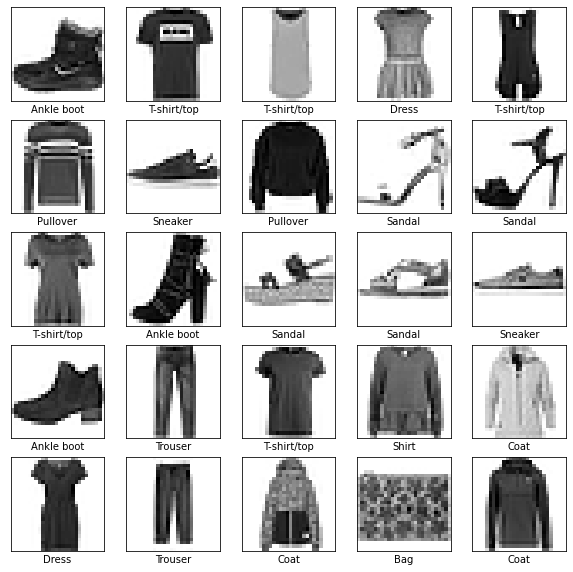

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build, compile and train the model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3008 - accuracy: 0.1175
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2908 - accuracy: 0.1645
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2670 - accuracy: 0.1762
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2321 - accuracy: 0.1960
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1886 - accuracy: 0.2040
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1423 - accuracy: 0.2129
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0956 - accuracy: 0.2242
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0518 - accuracy: 0.2451
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.011

# Evaluate accuracy

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.9794 - accuracy: 0.2522

Test accuracy: 0.25220000743865967


# Make predictions
This model's output is logits. Because the model is solving a multi-class classification problem, logits become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions)
np.argmax(predictions[0])

[[0.03194847 0.06933165 0.03047721 ... 0.23347242 0.10953593 0.18613526]
 [0.15559855 0.09697059 0.15855365 ... 0.02476532 0.07042341 0.03301851]
 [0.12261729 0.11249775 0.11996756 ... 0.05971138 0.09751158 0.06840688]
 ...
 [0.08816433 0.10834519 0.08572586 ... 0.10856041 0.11603179 0.10987447]
 [0.09992509 0.11197104 0.09691381 ... 0.09037565 0.11053467 0.09526962]
 [0.03974523 0.07804731 0.03798301 ... 0.21099684 0.11445884 0.17544398]]


7

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

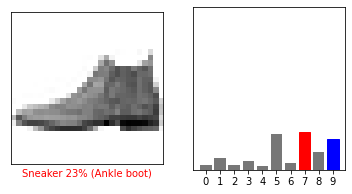

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

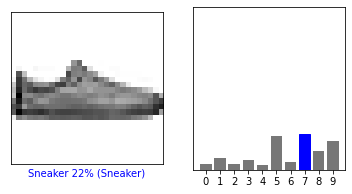

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

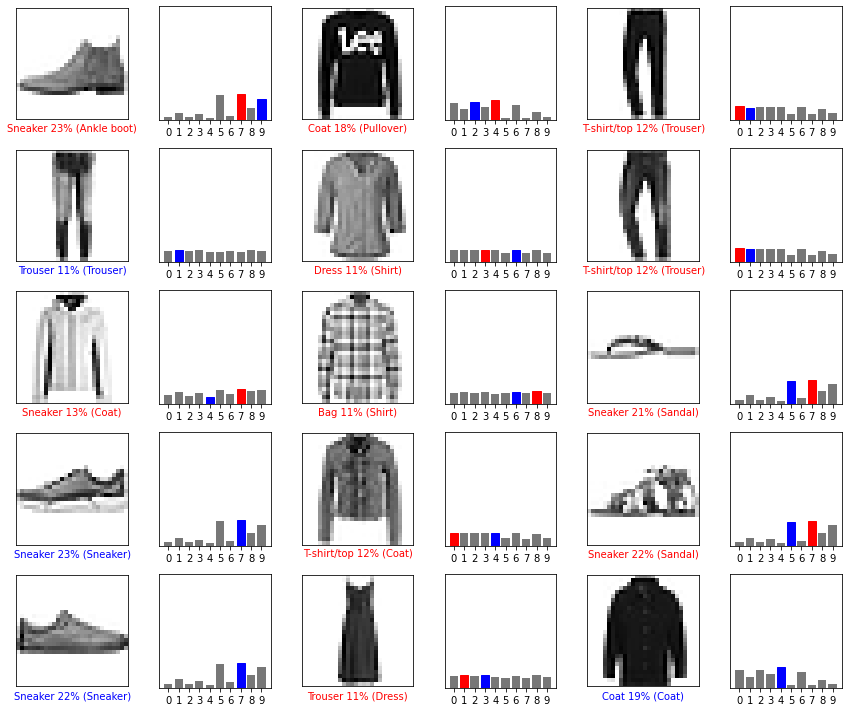

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()